## RFM Modelling

## 1. Import standard Libraries and packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import date

# 2. Data Loading

In [2]:
# Load excel file, which includes multiple worksheets
xls = pd.ExcelFile('../Resources/KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
# Assign each worksheet to a variable
CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic', skiprows=[0])
CustomerAddress = pd.read_excel(xls, 'CustomerAddress', skiprows=[0])
Transactions = pd.read_excel(xls, 'Transactions', skiprows=[0])
NewCustomerList = pd.read_excel(xls, 'NewCustomerList', skiprows=[0])

## Transaction Table

In [4]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Data Quality Analysis

In [5]:
# Check number of rows and columns
Transactions.shape

(20000, 13)

In [6]:
# Data types
Transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

* Notice, product_first_sold_date column is as float and it represents the number of days passed Dec 30 1899. This column will be converted to date_time.

### 1. Check data accuracy

In [7]:
# Check if transaction_id values are all unique
Transactions_duplicated = Transactions['transaction_id'].duplicated().any()
Transactions_duplicated

False

### 2. Check data completeness

In [8]:
# Count number of empty rows and the percentage of empty rows for each column
empty_rows_count = Transactions.isnull().sum()
empty_rows_perc = empty_rows_count/len(Transactions)*100

null_values_perc = pd.DataFrame(empty_rows_count, columns=['Null_rows_count'])
null_values_perc['Null_rows_percentage'] = empty_rows_perc
null_values_perc


,Null_rows_count,Null_rows_percentage
transaction_id,0,0.000
product_id,0,0.000
customer_id,0,0.000
transaction_date,0,0.000
online_order,360,1.800
order_status,0,0.000
brand,197,0.985
product_line,197,0.985
product_class,197,0.985
product_size,197,0.985


In [9]:
# Show rows without online_order values
Transactions[Transactions.online_order.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [10]:
# Show rows without brand values
Transactions[Transactions.brand.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


- There are 360 rows (1.8%) without online_order indicator. Since they only make up a small fraction of the data. We can drop these rows.
- There are also 197 rows without any product information. These rows have 6 columns with missing values and thus do not add much values to the analysis and ML model. They will also be dropped.

### 3. Check data consistency, misstyped values

In [11]:
Transactions['product_id'].unique()

array([  2,   3,  37,  88,  78,  25,  22,  15,  67,  12,   5,  61,  35,
        16,  79,  33,  54,  27,  82,  89,  64,  19,  72,  91,   1,  99,
         0,  92,  14,  44,  76,  46,  55,  66,  81,  86,  32,  77,  96,
         6,  47,  94,  93,  60,  28,   4,  38,  56,  58,  50,  80,  87,
        84,  21,  31,  62,  17,  73,  45,  49,  95,  18,  70,  26,  39,
        36,  98,  75,  42,  20,  24,  53,  65,  29,  11,  10,   7,  41,
         9,  69,  90,  97, 100,  74,  71,  34,  57,  23,  51,  59,  63,
        40,   8,  13,  30,  48,  68,  83,  43,  52,  85], dtype=int64)

In [12]:
Transactions['online_order'].unique()

array([ 0.,  1., nan])

In [13]:
Transactions['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [14]:
Transactions['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [15]:
Transactions['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [16]:
Transactions['product_class'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [17]:
Transactions['product_size'].unique()

array(['medium', 'large', 'small', nan], dtype=object)

### 4. Check data currency

* Customers information can be updated if there are any changes.

### 5. Check data relevancy

- All columns are relevant.

### 6. Validate data

In [18]:
# Summary statistics for columns with datatypes integer and float
Transactions.describe(include=['float64'])

,online_order,list_price,standard_cost,product_first_sold_date
count,19640.000000,20000.000000,19803.000000,19803.000000
mean,0.500458,1107.829449,556.046951,38199.776549
std,0.500013,582.825242,405.955660,2875.201110
min,0.000000,12.010000,7.210000,33259.000000
25%,0.000000,575.270000,215.140000,35667.000000
50%,1.000000,1163.890000,507.580000,38216.000000
75%,1.000000,1635.300000,795.100000,40672.000000
max,1.000000,2091.470000,1759.850000,42710.000000


- All numerical columns have values within acceptable min and max values.

### 7. Check for duplicates

In [19]:
# Count number of duplicates for each column
Transactions.duplicated().sum()

0

## Data Cleaning

**Change column product_first_sold_date dtype to date_time**

In [114]:
# Convert number of days into date_time
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='D',
                   origin=pd.Timestamp('1900-01-01'))

**Drop rows with nan values**

In [115]:
# Drop nan rows
Transactions.dropna(how='any', inplace=True)

In [116]:
# Check
Transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

**Replace misstyped data as suggested above**

- No columns have misstyped data.

**Drop irrelavant columns**

- No irrelavant columns.

In [117]:
# Save to csv
Transactions.to_csv('Transactions.csv')

## Preliminary Analysis

In [118]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


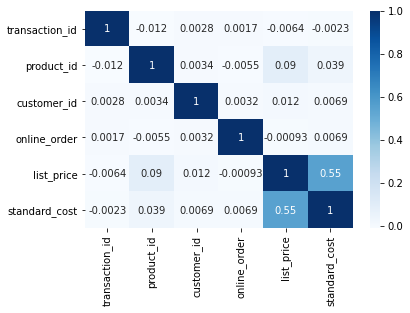

In [119]:
# Correlation matrix
corr = Transactions.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

- There are no major correlations except a positive correlation between list_price and standard_cost.

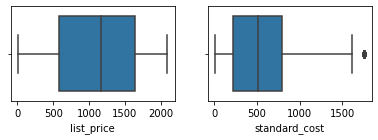

In [120]:
# Check for outliers
i=1
columns = ['list_price', 'standard_cost']
plt.figure(figsize=(10,8))
for j in columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=Transactions,x=Transactions[j])
    i+=1

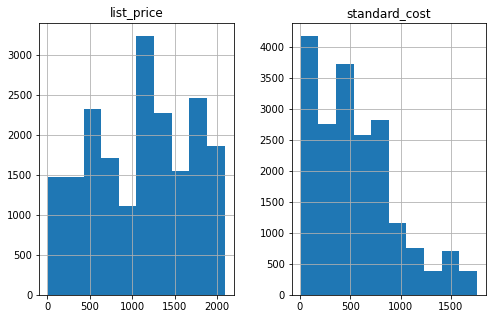

In [121]:
data = Transactions[['list_price', 'standard_cost']]
data.hist(figsize=(8,5))
plt.show()

- No variables follow a normal distribution.

In [122]:
# Calculate percentage of transactions by brand
data_brand = pd.DataFrame((Transactions.groupby(['brand'])['transaction_id'].count())/len(Transactions)*100)
data_brand = data_brand.sort_values(by=['transaction_id'], ascending=False)
data_brand = data_brand.reset_index()
data_brand

,brand,transaction_id
0,Solex,21.439959
1,WeareA2B,16.688095
2,Giant Bicycles,16.682952
3,OHM Cycles,15.392132
4,Trek Bicycles,15.073284
5,Norco Bicycles,14.723579


Text(0, 0.5, 'Percentage (%)')

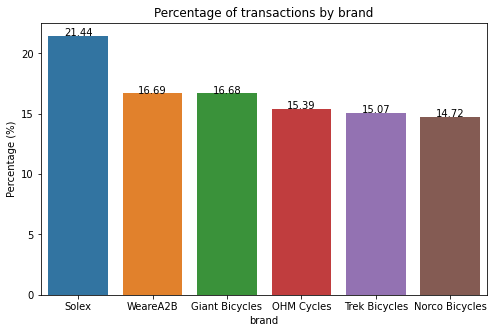

In [123]:
# Create bar plot
plt.figure(figsize=(8,5))
visual = sns.barplot(x="brand", y="transaction_id", data=data_brand )

for index, row in data_brand.iterrows():
    visual.text(row.name,row.transaction_id, round(row.transaction_id,2), color='black', ha="center")
plt.title('Percentage of transactions by brand')
plt.ylabel('Percentage (%)')

- Most of the brands are equally popular.

In [124]:
# Calculate percentage of transactions by product_line
data_line = pd.DataFrame((Transactions.groupby(['product_line'])['transaction_id'].count())/len(Transactions)*100)
data_line = data_line.sort_values(by=['transaction_id'], ascending=False)
data_line = data_line.reset_index()
data_line

,product_line,transaction_id
0,Standard,71.586526
1,Road,20.025714
2,Touring,6.238107
3,Mountain,2.149653


Text(0, 0.5, 'Percentage (%)')

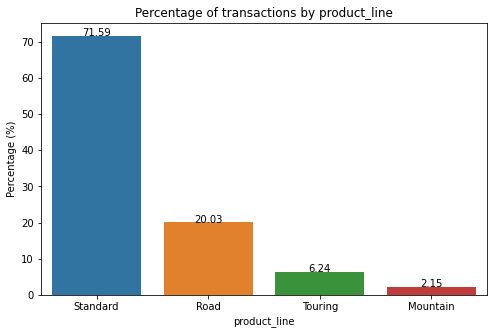

In [125]:
# Create bar plot
plt.figure(figsize=(8,5))
visual = sns.barplot(x="product_line", y="transaction_id", data=data_line )

for index, row in data_line.iterrows():
    visual.text(row.name,row.transaction_id, round(row.transaction_id,2), color='black', ha="center")
plt.title('Percentage of transactions by product_line')
plt.ylabel('Percentage (%)')

- Product line 'standard' is purchased most of the time, followed by 'road', ' touring', and 'mountain' products.

In [126]:
# Calculate percentage of transactions by product_class
data_class = pd.DataFrame((Transactions.groupby(['product_class'])['transaction_id'].count())/len(Transactions)*100)
data_class = data_class.sort_values(by=['transaction_id'], ascending=False)
data_class = data_class.reset_index()
data_class

,product_class,transaction_id
0,medium,69.874004
1,high,15.181281
2,low,14.944716


Text(0, 0.5, 'Percentage (%)')

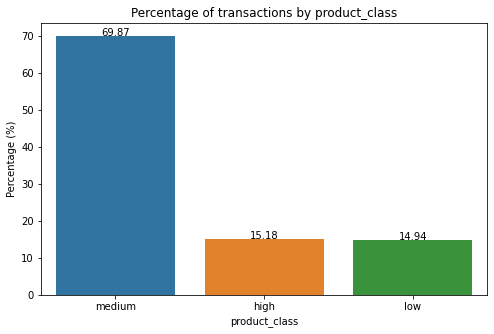

In [127]:
# Create bar plot
plt.figure(figsize=(8,5))
visual = sns.barplot(x="product_class", y="transaction_id", data=data_class )

for index, row in data_class.iterrows():
    visual.text(row.name,row.transaction_id, round(row.transaction_id,2), color='black', ha="center")
plt.title('Percentage of transactions by product_class')
plt.ylabel('Percentage (%)')

- Products with medium class is the most purchased, followed by high class and then low class.

In [128]:
# Calculate percentage of transactions by product_size
data_size = pd.DataFrame((Transactions.groupby(['product_size'])['transaction_id'].count())/len(Transactions)*100)
data_size = data_size.sort_values(by=['transaction_id'], ascending=False)
data_size = data_size.reset_index()
data_size

,product_size,transaction_id
0,medium,65.656981
1,large,20.056570
2,small,14.286449


Text(0, 0.5, 'Percentage (%)')

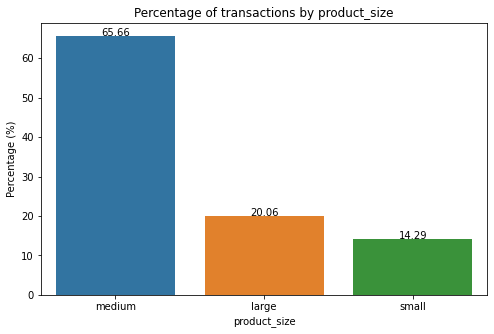

In [129]:
# Create bar plot
plt.figure(figsize=(8,5))
visual = sns.barplot(x="product_size", y="transaction_id", data=data_size )

for index, row in data_size.iterrows():
    visual.text(row.name,row.transaction_id, round(row.transaction_id,2), color='black', ha="center")
plt.title('Percentage of transactions by product_size')
plt.ylabel('Percentage (%)')

- Products with medium size is the most purchased, followed by large size and then small size.

**END OF DATA EXPLORATION AND CLEANING**

**NEXT STEP: BUILD POWER BI DASHBOARD**